#CNN

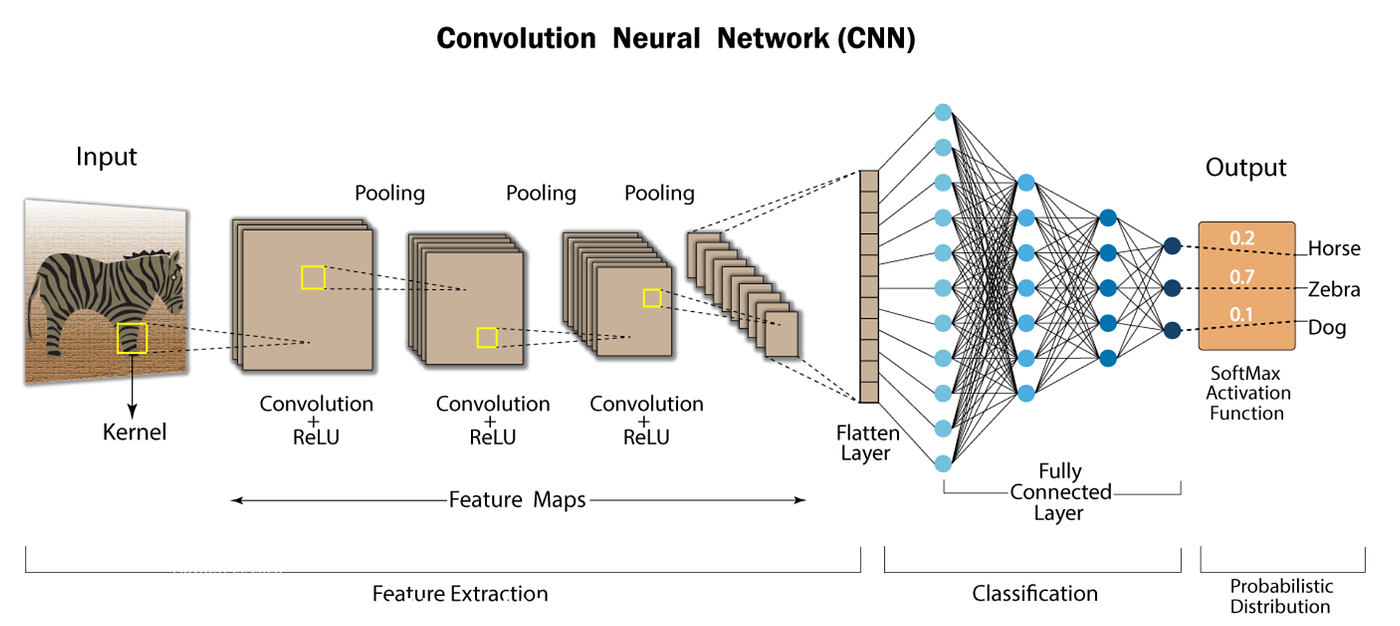

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


In [ ]:
## Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Normalize pixel value to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

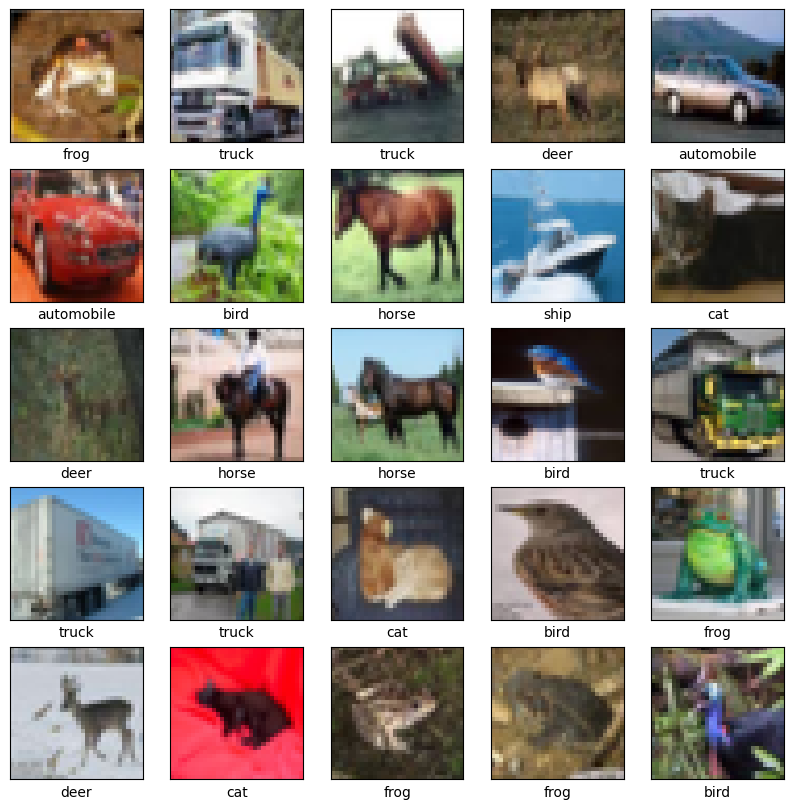

In [ ]:
## Function to plot images in grid
def plot_images(images, labels, class_names, num_images=25):
  plt.figure(figsize=(10,10))
  for i in range(num_images):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i][0]])
  plt.show()

plot_images(train_images, train_labels, class_names)

In [ ]:
## Define the CNN Model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes in CIFAR10
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 900,746 (3.44 MB)

 Trainable params: 900,746 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_cifar = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 226s 142ms/step - accuracy: 0.3720 - loss: 1.6889 - val_accuracy: 0.5962 - val_loss: 1.1187
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 140ms/step - accuracy: 0.6249 - loss: 1.0621 - val_accuracy: 0.6664 - val_loss: 0.9462
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 140ms/step - accuracy: 0.7022 - loss: 0.8515 - val_accuracy: 0.6866 - val_loss: 0.9028
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 264s 142ms/step - accuracy: 0.7438 - loss: 0.7303 - val_accuracy: 0.6972 - val_loss: 0.8628
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 260s 141ms/step - accuracy: 0.7819 - loss: 0.6232 - val_accuracy: 0.7292 - val_loss: 0.8115
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 223s 143ms/step - accuracy: 0.8186 - loss: 0.5184 - val_accuracy: 0.7336 - val_loss: 0.8373
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 148ms/step - accuracy: 0.8450 - loss: 0.4363 - val_accuracy: 0.7348 - val_loss: 0.8436
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 266s 150ms/step - ac

In [ ]:
## Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print(f'\nTest accuracy:{test_acc}')

313/313 - 9s - 28ms/step - accuracy: 0.7200 - loss: 1.0975

Test accuracy:0.7200000286102295


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
Predicted class: horse
Actual class: horse


Text(0.5, 1.0, 'Predicted:horse,Actual: horse')

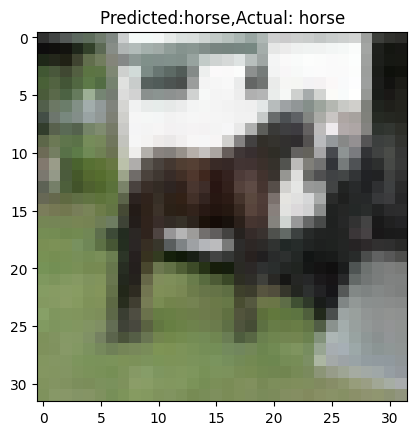

In [ ]:
## Make Predictions
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# Example Prediction
import numpy as np
predicted_class = np.argmax(predictions[20])
actual_class = test_labels[20][0]

## Print the Predicted and actual class names
print(f"Predicted class: {class_names[predicted_class]}")
print(f"Actual class: {class_names[actual_class]}")

plt.imshow(test_images[20])
plt.title(f"Predicted:{class_names[predicted_class]},Actual: {class_names[actual_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: horse


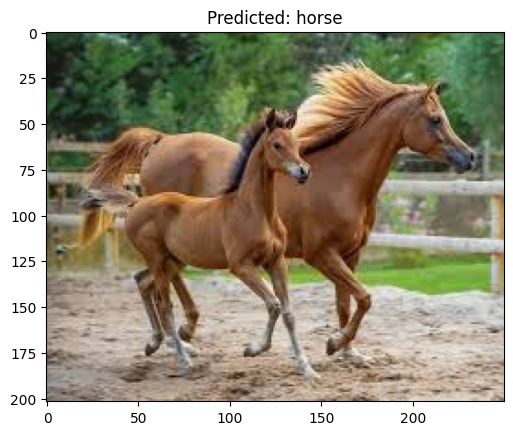

In [ ]:
## FUnction to Prepare and external image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
def preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(32, 32))  # Resize to 32x32 pixels
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match model input shape (1, 32, 32, 3)
    return img_array

## FUnction to predict the class of an external image

def predict_external_image(image_path):
    img_array = preprocess_image(image_path)
    predictions = probability_model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    print(f"Predicted class: {class_names[predicted_class]}")

    plt.imshow(load_img(image_path))
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.show()

## Specify the path to your external image
external_image_path = '/content/images (1).jfif'

## predict the class of the external image
predict_external_image(external_image_path)